In [1]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ETL

### Importing CSVs

In [2]:
#American Airlines Group
A1G = pd.read_csv("../CSVs/A1G.F.csv")

In [3]:
#Boeing 
BA = pd.read_csv("../CSVs/BA.csv")

In [4]:
#CSX Rail
CSX = pd.read_csv("../CSVs/CSX.csv")

In [5]:
#General Motors
GM = pd.read_csv("../CSVs/GM.csv")

In [6]:
#Cleaned and Natual language sentiment evaluated tweets
Tweets = pd.read_csv("../TweetSentiment.csv")

In [7]:
print(f'A1G:')
print(A1G.head())
A1G = A1G.dropna()
print(A1G.shape)

A1G:
         Date       Open       High        Low      Close  Adj Close  Volume
0  2018-01-02  43.400002  43.400002  43.000000  43.400002  42.144642   420.0
1  2018-01-03  43.799999  43.799999  43.400002  43.400002  42.144642   125.0
2  2018-01-04  43.400002  43.799999  43.400002  43.400002  42.144642    72.0
3  2018-01-05  43.400002  44.000000  43.400002  43.599998  42.338856    60.0
4  2018-01-08  43.799999  43.799999  43.599998  43.599998  42.338856     0.0
(502, 7)


In [8]:
print(f'BA:')
print(BA.head())
BA = BA.dropna()
print(BA.shape)

BA:
         Date        Open        High         Low       Close   Adj Close  \
0  2018-01-02  295.750000  296.989990  295.399994  296.839996  284.569489   
1  2018-01-03  295.940002  298.500000  295.470001  297.799988  285.489807   
2  2018-01-04  297.940002  298.420013  295.470001  296.670013  284.406555   
3  2018-01-05  296.769989  308.890015  296.720001  308.839996  296.073425   
4  2018-01-08  308.660004  310.859985  305.750000  310.149994  297.329315   

    Volume  
0  2978900  
1  3211200  
2  4171700  
3  6177700  
4  4124900  
(502, 7)


In [9]:
print(f'CSX:')
print(CSX.head())
CSX = CSX.dropna()
print(CSX.shape)

CSX:
         Date       Open       High        Low      Close  Adj Close   Volume
0  2018-01-02  55.630001  56.630001  55.020000  56.340000  54.840424  5881300
1  2018-01-03  56.160000  57.250000  56.060001  57.049999  55.531528  7735800
2  2018-01-04  57.349998  57.959999  56.639999  56.779999  55.268707  5840300
3  2018-01-05  57.580002  57.950001  56.919998  57.720001  56.183697  6308800
4  2018-01-08  57.340000  58.970001  57.340000  58.740002  57.176540  6224700
(502, 7)


In [10]:
print(f'GM')
print(GM.head())
GM = GM.dropna()
print(GM.shape)

GM
         Date       Open       High        Low      Close  Adj Close    Volume
0  2018-01-02  41.240002  41.869999  41.150002  41.799999  38.536655   6934600
1  2018-01-03  42.209999  42.950001  42.200001  42.820000  39.477020  14591600
2  2018-01-04  43.090000  44.250000  43.009998  44.139999  40.693970  17298700
3  2018-01-05  44.500000  44.639999  43.959999  44.009998  40.574112   9643300
4  2018-01-08  44.040001  44.590000  43.520000  44.220001  40.767723  13099600
(502, 7)


In [11]:
print("Tweets:")
print(Tweets.head())

Tweets:
    tweetdate  compound       neg       neu       pos
0  2018-01-01  0.271533  0.116333  0.681667  0.201667
1  2018-01-02  0.567400  0.080154  0.709692  0.210231
2  2018-01-03  0.113950  0.094750  0.782750  0.122500
3  2018-01-04 -0.029990  0.113300  0.779300  0.107300
4  2018-01-05 -0.083683  0.072833  0.851667  0.075833


### Transforming DataFrames

In [12]:
#Adding New Columns for A1G, BA, CSX, GM

A1G["P/N"] = np.where(A1G.eval("Open < Close"), "Positive", "Negative ")
A1G['Daily_Change'] = A1G.Close.diff()
A1G['Daily_%_Change'] = A1G.Close.pct_change() * 100
A1G['Future_Change'] = A1G.Close.diff(periods=-1) * -1


BA["P/N"] = np.where(BA.eval("Open < Close"), "Positive", "Negative ")
BA['Daily_Change'] = BA.Close.diff()
BA['Daily_%_Change'] = BA.Close.pct_change() * 100
BA['Future_Change'] = BA.Close.diff(periods=-1) * -1


CSX["P/N"] = np.where(CSX.eval("Open < Close"), "Positive", "Negative ")
CSX['Daily_Change'] = CSX.Close.diff()
CSX['Daily_%_Change'] = CSX.Close.pct_change() * 100
CSX['Future_Change'] = CSX.Close.diff(periods=-1) * -1



GM["P/N"] = np.where(GM.eval("Open < Close"), "Positive", "Negative ")
GM['Daily_Change'] = GM.Close.diff()
GM['Daily_%_Change'] = GM.Close.pct_change() * 100
GM['Future_Change'] = GM.Close.diff(periods=-1) * -1

#reformatting date columns
A1G['Date'] = pd.to_datetime(A1G['Date']).dt.strftime('%m/%d/%Y')
BA['Date'] = pd.to_datetime(BA['Date']).dt.strftime('%m/%d/%Y')
CSX['Date'] = pd.to_datetime(CSX['Date']).dt.strftime('%m/%d/%Y')
GM['Date'] = pd.to_datetime(GM['Date']).dt.strftime('%m/%d/%Y')
Tweets['tweetdate'] = pd.to_datetime(Tweets['tweetdate']).dt.strftime('%m/%d/%Y')
Tweets.rename(columns = {'tweetdate':'Date'}, inplace = True)

In [13]:
print('A1G:')
A1G.head()

A1G:


Date       Open       High        Low      Close  Adj Close  Volume  \
0  01/02/2018  43.400002  43.400002  43.000000  43.400002  42.144642   420.0   
1  01/03/2018  43.799999  43.799999  43.400002  43.400002  42.144642   125.0   
2  01/04/2018  43.400002  43.799999  43.400002  43.400002  42.144642    72.0   
3  01/05/2018  43.400002  44.000000  43.400002  43.599998  42.338856    60.0   
4  01/08/2018  43.799999  43.799999  43.599998  43.599998  42.338856     0.0   

         P/N  Daily_Change  Daily_%_Change  Future_Change  
0  Negative            NaN             NaN      -0.000000  
1  Negative       0.000000         0.00000      -0.000000  
2  Negative       0.000000         0.00000       0.199996  
3   Positive      0.199996         0.46082      -0.000000  
4  Negative       0.000000         0.00000       0.600003

In [14]:
print('BA:')
BA.head()

BA:


Date        Open        High         Low       Close   Adj Close  \
0  01/02/2018  295.750000  296.989990  295.399994  296.839996  284.569489   
1  01/03/2018  295.940002  298.500000  295.470001  297.799988  285.489807   
2  01/04/2018  297.940002  298.420013  295.470001  296.670013  284.406555   
3  01/05/2018  296.769989  308.890015  296.720001  308.839996  296.073425   
4  01/08/2018  308.660004  310.859985  305.750000  310.149994  297.329315   

    Volume        P/N  Daily_Change  Daily_%_Change  Future_Change  
0  2978900   Positive           NaN             NaN       0.959992  
1  3211200   Positive      0.959992        0.323404      -1.129975  
2  4171700  Negative      -1.129975       -0.379441      12.169983  
3  6177700   Positive     12.169983        4.102195       1.309998  
4  4124900   Positive      1.309998        0.424167       8.279999

In [15]:
print('CSX:')
CSX.head()

CSX:


Date       Open       High        Low      Close  Adj Close   Volume  \
0  01/02/2018  55.630001  56.630001  55.020000  56.340000  54.840424  5881300   
1  01/03/2018  56.160000  57.250000  56.060001  57.049999  55.531528  7735800   
2  01/04/2018  57.349998  57.959999  56.639999  56.779999  55.268707  5840300   
3  01/05/2018  57.580002  57.950001  56.919998  57.720001  56.183697  6308800   
4  01/08/2018  57.340000  58.970001  57.340000  58.740002  57.176540  6224700   

         P/N  Daily_Change  Daily_%_Change  Future_Change  
0   Positive           NaN             NaN       0.709999  
1   Positive      0.709999        1.260204      -0.270000  
2  Negative      -0.270000       -0.473269       0.940002  
3   Positive      0.940002        1.655516       1.020001  
4   Positive      1.020001        1.767153       0.519996

In [16]:
print('GM:')
GM.head()

GM:


Date       Open       High        Low      Close  Adj Close  \
0  01/02/2018  41.240002  41.869999  41.150002  41.799999  38.536655   
1  01/03/2018  42.209999  42.950001  42.200001  42.820000  39.477020   
2  01/04/2018  43.090000  44.250000  43.009998  44.139999  40.693970   
3  01/05/2018  44.500000  44.639999  43.959999  44.009998  40.574112   
4  01/08/2018  44.040001  44.590000  43.520000  44.220001  40.767723   

     Volume        P/N  Daily_Change  Daily_%_Change  Future_Change  
0   6934600   Positive           NaN             NaN       1.020001  
1  14591600   Positive      1.020001        2.440194       1.319999  
2  17298700   Positive      1.319999        3.082669      -0.130001  
3   9643300  Negative      -0.130001       -0.294520       0.210003  
4  13099600   Positive      0.210003        0.477171      -0.170002

In [17]:
print('Tweets:')
Tweets.head()

Tweets:


Date  compound       neg       neu       pos
0  01/01/2018  0.271533  0.116333  0.681667  0.201667
1  01/02/2018  0.567400  0.080154  0.709692  0.210231
2  01/03/2018  0.113950  0.094750  0.782750  0.122500
3  01/04/2018 -0.029990  0.113300  0.779300  0.107300
4  01/05/2018 -0.083683  0.072833  0.851667  0.075833

### Merging Frames

In [18]:
#Joining Tweets to Stock symbols
A1G = A1G.merge(Tweets,how = 'inner', on = 'Date')
BA = BA.merge(Tweets, how = 'inner', on = 'Date')
CSX = CSX.merge(Tweets, how = 'inner', on = 'Date')
GM = GM.merge(Tweets, how = 'inner', on = 'Date')

In [19]:
A1G.head()

Date       Open       High        Low      Close  Adj Close  Volume  \
0  01/02/2018  43.400002  43.400002  43.000000  43.400002  42.144642   420.0   
1  01/03/2018  43.799999  43.799999  43.400002  43.400002  42.144642   125.0   
2  01/04/2018  43.400002  43.799999  43.400002  43.400002  42.144642    72.0   
3  01/05/2018  43.400002  44.000000  43.400002  43.599998  42.338856    60.0   
4  01/08/2018  43.799999  43.799999  43.599998  43.599998  42.338856     0.0   

         P/N  Daily_Change  Daily_%_Change  Future_Change  compound       neg  \
0  Negative            NaN             NaN      -0.000000  0.567400  0.080154   
1  Negative       0.000000         0.00000      -0.000000  0.113950  0.094750   
2  Negative       0.000000         0.00000       0.199996 -0.029990  0.113300   
3   Positive      0.199996         0.46082      -0.000000 -0.083683  0.072833   
4  Negative       0.000000         0.00000       0.600003  0.169057  0.062143   

        neu       pos  
0  0.709692  0.210231  
1  0.782750  0.122500  
2  0.779300  0.107300  
3  0.851667  0.075833  
4  0.839000  0.099000

In [20]:
BA.head()

Date        Open        High         Low       Close   Adj Close  \
0  01/02/2018  295.750000  296.989990  295.399994  296.839996  284.569489   
1  01/03/2018  295.940002  298.500000  295.470001  297.799988  285.489807   
2  01/04/2018  297.940002  298.420013  295.470001  296.670013  284.406555   
3  01/05/2018  296.769989  308.890015  296.720001  308.839996  296.073425   
4  01/08/2018  308.660004  310.859985  305.750000  310.149994  297.329315   

    Volume        P/N  Daily_Change  Daily_%_Change  Future_Change  compound  \
0  2978900   Positive           NaN             NaN       0.959992  0.567400   
1  3211200   Positive      0.959992        0.323404      -1.129975  0.113950   
2  4171700  Negative      -1.129975       -0.379441      12.169983 -0.029990   
3  6177700   Positive     12.169983        4.102195       1.309998 -0.083683   
4  4124900   Positive      1.309998        0.424167       8.279999  0.169057   

        neg       neu       pos  
0  0.080154  0.709692  0.210231  
1  0.094750  0.782750  0.122500  
2  0.113300  0.779300  0.107300  
3  0.072833  0.851667  0.075833  
4  0.062143  0.839000  0.099000

In [21]:
CSX.head()

Date       Open       High        Low      Close  Adj Close   Volume  \
0  01/02/2018  55.630001  56.630001  55.020000  56.340000  54.840424  5881300   
1  01/03/2018  56.160000  57.250000  56.060001  57.049999  55.531528  7735800   
2  01/04/2018  57.349998  57.959999  56.639999  56.779999  55.268707  5840300   
3  01/05/2018  57.580002  57.950001  56.919998  57.720001  56.183697  6308800   
4  01/08/2018  57.340000  58.970001  57.340000  58.740002  57.176540  6224700   

         P/N  Daily_Change  Daily_%_Change  Future_Change  compound       neg  \
0   Positive           NaN             NaN       0.709999  0.567400  0.080154   
1   Positive      0.709999        1.260204      -0.270000  0.113950  0.094750   
2  Negative      -0.270000       -0.473269       0.940002 -0.029990  0.113300   
3   Positive      0.940002        1.655516       1.020001 -0.083683  0.072833   
4   Positive      1.020001        1.767153       0.519996  0.169057  0.062143   

        neu       pos  
0  0.709692  0.210231  
1  0.782750  0.122500  
2  0.779300  0.107300  
3  0.851667  0.075833  
4  0.839000  0.099000

In [22]:
GM.head()

Date       Open       High        Low      Close  Adj Close  \
0  01/02/2018  41.240002  41.869999  41.150002  41.799999  38.536655   
1  01/03/2018  42.209999  42.950001  42.200001  42.820000  39.477020   
2  01/04/2018  43.090000  44.250000  43.009998  44.139999  40.693970   
3  01/05/2018  44.500000  44.639999  43.959999  44.009998  40.574112   
4  01/08/2018  44.040001  44.590000  43.520000  44.220001  40.767723   

     Volume        P/N  Daily_Change  Daily_%_Change  Future_Change  compound  \
0   6934600   Positive           NaN             NaN       1.020001  0.567400   
1  14591600   Positive      1.020001        2.440194       1.319999  0.113950   
2  17298700   Positive      1.319999        3.082669      -0.130001 -0.029990   
3   9643300  Negative      -0.130001       -0.294520       0.210003 -0.083683   
4  13099600   Positive      0.210003        0.477171      -0.170002  0.169057   

        neg       neu       pos  
0  0.080154  0.709692  0.210231  
1  0.094750  0.782750  0.122500  
2  0.113300  0.779300  0.107300  
3  0.072833  0.851667  0.075833  
4  0.062143  0.839000  0.099000

In [23]:
A1G.to_csv("../CSVs/A1Grevised.csv", index = False)
BA.to_csv("../CSVs/BArevised.csv", index = False)
CSX.to_csv("../CSVs/CSXrevised.csv", index = False)
GM.to_csv("../CSVs/GMrevised.csv", index = False)

### Dummy Encoding P/N column

In [24]:
A1G_encoded = pd.get_dummies(A1G, columns=["P/N"])
A1G_encoded.rename(columns = {"P/N_Negative ":"Change_Negative", "P/N_Positive":"Change_Positive"}, inplace = True)
A1G_encoded.head()

Date       Open       High        Low      Close  Adj Close  Volume  \
0  01/02/2018  43.400002  43.400002  43.000000  43.400002  42.144642   420.0   
1  01/03/2018  43.799999  43.799999  43.400002  43.400002  42.144642   125.0   
2  01/04/2018  43.400002  43.799999  43.400002  43.400002  42.144642    72.0   
3  01/05/2018  43.400002  44.000000  43.400002  43.599998  42.338856    60.0   
4  01/08/2018  43.799999  43.799999  43.599998  43.599998  42.338856     0.0   

   Daily_Change  Daily_%_Change  Future_Change  compound       neg       neu  \
0           NaN             NaN      -0.000000  0.567400  0.080154  0.709692   
1      0.000000         0.00000      -0.000000  0.113950  0.094750  0.782750   
2      0.000000         0.00000       0.199996 -0.029990  0.113300  0.779300   
3      0.199996         0.46082      -0.000000 -0.083683  0.072833  0.851667   
4      0.000000         0.00000       0.600003  0.169057  0.062143  0.839000   

        pos  Change_Negative  Change_Positive  
0  0.210231                1                0  
1  0.122500                1                0  
2  0.107300                1                0  
3  0.075833                0                1  
4  0.099000                1                0

In [25]:
BA_encoded = pd.get_dummies(BA, columns=["P/N"])
BA_encoded.rename(columns = {"P/N_Negative ":"Change_Negative", "P/N_Positive":"Change_Positive"}, inplace = True)
BA_encoded.head()

Date        Open        High         Low       Close   Adj Close  \
0  01/02/2018  295.750000  296.989990  295.399994  296.839996  284.569489   
1  01/03/2018  295.940002  298.500000  295.470001  297.799988  285.489807   
2  01/04/2018  297.940002  298.420013  295.470001  296.670013  284.406555   
3  01/05/2018  296.769989  308.890015  296.720001  308.839996  296.073425   
4  01/08/2018  308.660004  310.859985  305.750000  310.149994  297.329315   

    Volume  Daily_Change  Daily_%_Change  Future_Change  compound       neg  \
0  2978900           NaN             NaN       0.959992  0.567400  0.080154   
1  3211200      0.959992        0.323404      -1.129975  0.113950  0.094750   
2  4171700     -1.129975       -0.379441      12.169983 -0.029990  0.113300   
3  6177700     12.169983        4.102195       1.309998 -0.083683  0.072833   
4  4124900      1.309998        0.424167       8.279999  0.169057  0.062143   

        neu       pos  Change_Negative  Change_Positive  
0  0.709692  0.210231                0                1  
1  0.782750  0.122500                0                1  
2  0.779300  0.107300                1                0  
3  0.851667  0.075833                0                1  
4  0.839000  0.099000                0                1

In [26]:
CSX_encoded = pd.get_dummies(CSX, columns=["P/N"])
CSX_encoded.rename(columns = {"P/N_Negative ":"Change_Negative", "P/N_Positive":"Change_Positive"}, inplace = True)
CSX_encoded.head()

Date       Open       High        Low      Close  Adj Close   Volume  \
0  01/02/2018  55.630001  56.630001  55.020000  56.340000  54.840424  5881300   
1  01/03/2018  56.160000  57.250000  56.060001  57.049999  55.531528  7735800   
2  01/04/2018  57.349998  57.959999  56.639999  56.779999  55.268707  5840300   
3  01/05/2018  57.580002  57.950001  56.919998  57.720001  56.183697  6308800   
4  01/08/2018  57.340000  58.970001  57.340000  58.740002  57.176540  6224700   

   Daily_Change  Daily_%_Change  Future_Change  compound       neg       neu  \
0           NaN             NaN       0.709999  0.567400  0.080154  0.709692   
1      0.709999        1.260204      -0.270000  0.113950  0.094750  0.782750   
2     -0.270000       -0.473269       0.940002 -0.029990  0.113300  0.779300   
3      0.940002        1.655516       1.020001 -0.083683  0.072833  0.851667   
4      1.020001        1.767153       0.519996  0.169057  0.062143  0.839000   

        pos  Change_Negative  Change_Positive  
0  0.210231                0                1  
1  0.122500                0                1  
2  0.107300                1                0  
3  0.075833                0                1  
4  0.099000                0                1

In [27]:
GM_encoded = pd.get_dummies(GM, columns=["P/N"])
GM_encoded.rename(columns = {"P/N_Negative ":"Change_Negative", "P/N_Positive":"Change_Positive"}, inplace = True)
GM_encoded.head()

Date       Open       High        Low      Close  Adj Close  \
0  01/02/2018  41.240002  41.869999  41.150002  41.799999  38.536655   
1  01/03/2018  42.209999  42.950001  42.200001  42.820000  39.477020   
2  01/04/2018  43.090000  44.250000  43.009998  44.139999  40.693970   
3  01/05/2018  44.500000  44.639999  43.959999  44.009998  40.574112   
4  01/08/2018  44.040001  44.590000  43.520000  44.220001  40.767723   

     Volume  Daily_Change  Daily_%_Change  Future_Change  compound       neg  \
0   6934600           NaN             NaN       1.020001  0.567400  0.080154   
1  14591600      1.020001        2.440194       1.319999  0.113950  0.094750   
2  17298700      1.319999        3.082669      -0.130001 -0.029990  0.113300   
3   9643300     -0.130001       -0.294520       0.210003 -0.083683  0.072833   
4  13099600      0.210003        0.477171      -0.170002  0.169057  0.062143   

        neu       pos  Change_Negative  Change_Positive  
0  0.709692  0.210231                0                1  
1  0.782750  0.122500                0                1  
2  0.779300  0.107300                0                1  
3  0.851667  0.075833                1                0  
4  0.839000  0.099000                0                1

# Linear Modeling

### Basic Plotting American Airlines Group

In [28]:
A1G_X = A1G_encoded[['neg','pos','neu']]
A1G_y = A1G_encoded[['Change_Positive','Change_Negative']]
print(A1G_X.shape,A1G_y.shape)

(499, 3) (499, 2)


In [29]:
X_train, X_test, y_train, y_test = split(A1G_X, A1G_y)

In [30]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [31]:
model_A1G = LinearRegression()
model_A1G.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

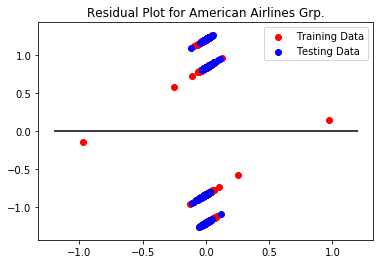

In [32]:
plt.scatter(model_A1G.predict(X_train_scaled), model_A1G.predict(X_train_scaled) - y_train_scaled, c="red", label="Training Data")
plt.scatter(model_A1G.predict(X_test_scaled), model_A1G.predict(X_test_scaled) - y_test_scaled, c="blue", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot for American Airlines Grp.")
plt.show()


### Quantifying A1G

In [33]:
predictions = model_A1G.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model_A1G.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE},\nR2: {r2}")
print(f'Model test score: {model_A1G.score(X_test_scaled, y_test_scaled)}')
print(f'Model training score:  {model_A1G.score(X_train_scaled, y_train_scaled)}')

MSE: 1.0412059292698017,
R2: -0.01779436237357135
Model test score: -0.01779436237357135
Model training score:  0.0034277826179915367


### Plotting Boeing 

In [34]:
BA_X = BA_encoded[['neg','pos','neu']]
BA_y = BA_encoded[['Change_Positive','Change_Negative']]
print(BA_X.shape,BA_y.shape)

(499, 3) (499, 2)


In [35]:
X_train, X_test, y_train, y_test = split(BA_X, BA_y)

In [36]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [37]:
model_BA = LinearRegression()
model_BA.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

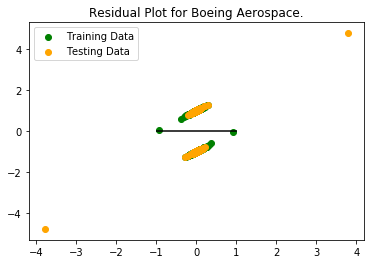

In [38]:
plt.scatter(model_BA.predict(X_train_scaled), model_BA.predict(X_train_scaled) - y_train_scaled, c="green", label="Training Data")
plt.scatter(model_BA.predict(X_test_scaled), model_BA.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot for Boeing Aerospace.")
plt.show()


### Quantifying Boeing

In [39]:
predictions = model_BA.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model_BA.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE},\nR2: {r2}")
print(f'Model test score: {model_BA.score(X_test_scaled, y_test_scaled)}')
print(f'Model training score:  {model_BA.score(X_train_scaled, y_train_scaled)}')

MSE: 1.1943786353147068,
R2: -0.20029355892238665
Model test score: -0.20029355892238665
Model training score:  0.010232244769819874


### Plotting CSX Rail

(499, 3) (499, 2)


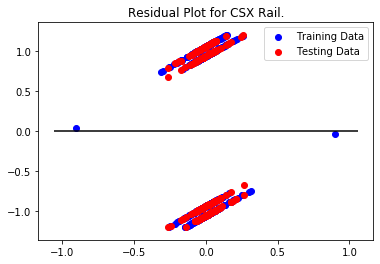

In [40]:
CSX_X = CSX_encoded[['pos','neg','neu']]
CSX_y = CSX_encoded[['Change_Positive','Change_Negative']]
print(CSX_X.shape,CSX_y.shape)

X_train, X_test, y_train, y_test = split(CSX_X, CSX_y)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

model_CSX = LinearRegression()
model_CSX.fit(X_train_scaled, y_train_scaled)

plt.scatter(model_CSX.predict(X_train_scaled), model_CSX.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model_CSX.predict(X_test_scaled), model_CSX.predict(X_test_scaled) - y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot for CSX Rail.")
plt.show()

### Quantifying CSX Rail

In [41]:
predictions = model_CSX.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model_CSX.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE},\nR2: {r2}")
print(f'Model test score: {model_CSX.score(X_test_scaled, y_test_scaled)}')
print(f'Model training score:  {model_CSX.score(X_train_scaled, y_train_scaled)}')

MSE: 0.9944485519959387,
R2: 0.007404293323191258
Model test score: 0.007404293323191258
Model training score:  0.007847699343459191


### Plotting General Motors

(499, 3) (499, 2)


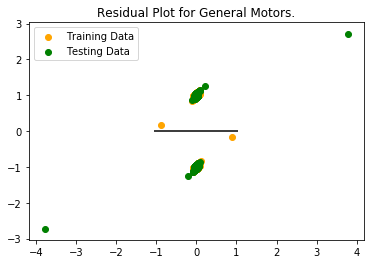

In [42]:
GM_X = GM_encoded[['pos','neg','neu']]
GM_y = GM_encoded[['Change_Positive','Change_Negative']]
print(GM_X.shape,GM_y.shape)

X_train, X_test, y_train, y_test = split(GM_X, GM_y)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

model_GM = LinearRegression()
model_GM.fit(X_train_scaled, y_train_scaled)

plt.scatter(model_GM.predict(X_train_scaled), model_GM.predict(X_train_scaled) - y_train_scaled, c="orange", label="Training Data")
plt.scatter(model_GM.predict(X_test_scaled), model_GM.predict(X_test_scaled) - y_test_scaled, c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot for General Motors.")
plt.show()

### Quantifying General Motors

In [43]:
predictions = model_GM.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model_GM.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE},\nR2: {r2}")
print(f'Model test score: {model_GM.score(X_test_scaled, y_test_scaled)}')
print(f'Model training score:  {model_GM.score(X_train_scaled, y_train_scaled)}')

MSE: 1.0643836034751348,
R2: -0.06361992388199988
Model test score: -0.06361992388199988
Model training score:  0.003205834480693892


# Logistic Modeling

### A1G

In [44]:
A1G = A1G.dropna()
A1G_LogX = A1G.drop(["Date","P/N"],axis = 1)
A1G_LogY = A1G["P/N"]
print(A1G_LogX.shape,A1G_LogY.shape)

(497, 13) (497,)


In [45]:
X_train, X_test, y_train, y_test = split(A1G_LogX, A1G_LogY, stratify=A1G_LogY)

In [46]:
from sklearn.linear_model import LogisticRegression
myClassifier = LogisticRegression()
myClassifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
myClassifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
print(f"Training Data Score: {myClassifier.score(X_train, y_train)}")
print(f"Testing Data Score: {myClassifier.score(X_test, y_test)}")

Training Data Score: 0.9301075268817204
Testing Data Score: 0.936


In [49]:
#making predictions
myPredictions = myClassifier.predict(X_test)
print(f"First 10 Predictions:   {myPredictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Positive' 'Positive' 'Positive' 'Positive' 'Negative ' 'Positive'
 'Negative ' 'Negative ' 'Negative ' 'Positive']
First 10 Actual labels: ['Positive', 'Positive', 'Positive', 'Positive', 'Negative ', 'Positive', 'Negative ', 'Negative ', 'Negative ', 'Positive']


In [50]:
A1G_results = pd.DataFrame({"Prediction": myPredictions, "Actual": y_test}).reset_index(drop=True)
A1G_results

Prediction     Actual
0     Positive   Positive
1     Positive   Positive
2     Positive   Positive
3     Positive   Positive
4    Negative   Negative 
..         ...        ...
120   Positive   Positive
121   Positive   Positive
122   Positive   Positive
123   Positive   Positive
124   Positive  Negative 

[125 rows x 2 columns]

### Quantifying A1G

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, myPredictions,
                            target_names=["Positive", "Negative"]))

              precision    recall  f1-score   support

    Positive       0.98      0.87      0.92        52
    Negative       0.91      0.99      0.95        73

    accuracy                           0.94       125
   macro avg       0.94      0.93      0.93       125
weighted avg       0.94      0.94      0.94       125



### BA

In [52]:
BA = BA.dropna()
BA_LogX = BA.drop(["Date","P/N"],axis = 1)
BA_LogY = BA["P/N"]
print(BA_LogX.shape,BA_LogY.shape)

(497, 13) (497,)


In [53]:
X_train, X_test, y_train, y_test = split(BA_LogX, BA_LogY, stratify=BA_LogY)

In [54]:
myClassifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
print(f"Training Data Score: {myClassifier.score(X_train, y_train)}")
print(f"Testing Data Score: {myClassifier.score(X_test, y_test)}")

Training Data Score: 0.8817204301075269
Testing Data Score: 0.792


In [56]:
#making predictions
myPredictions = myClassifier.predict(X_test)
print(f"First 10 Predictions:   {myPredictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
BA_results = pd.DataFrame({"Prediction": myPredictions, "Actual": y_test}).reset_index(drop=True)
BA_results

First 10 Predictions:   ['Negative ' 'Positive' 'Negative ' 'Positive' 'Negative ' 'Negative '
 'Negative ' 'Negative ' 'Positive' 'Negative ']
First 10 Actual labels: ['Negative ', 'Positive', 'Negative ', 'Negative ', 'Negative ', 'Negative ', 'Positive', 'Negative ', 'Positive', 'Negative ']


Prediction     Actual
0    Negative   Negative 
1     Positive   Positive
2    Negative   Negative 
3     Positive  Negative 
4    Negative   Negative 
..         ...        ...
120  Negative   Negative 
121   Positive   Positive
122   Positive   Positive
123  Negative   Negative 
124  Negative    Positive

[125 rows x 2 columns]

In [57]:
print(classification_report(y_test, myPredictions,
                            target_names=["Positive", "Negative"]))

              precision    recall  f1-score   support

    Positive       0.75      0.89      0.81        63
    Negative       0.86      0.69      0.77        62

    accuracy                           0.79       125
   macro avg       0.80      0.79      0.79       125
weighted avg       0.80      0.79      0.79       125



### CSX

In [58]:
CSX = CSX.dropna()
CSX_LogX = CSX.drop(["Date","P/N"],axis = 1)
CSX_LogY = CSX["P/N"]
print(CSX_LogX.shape,CSX_LogY.shape)

(497, 13) (497,)


In [59]:
X_train, X_test, y_train, y_test = split(CSX_LogX, CSX_LogY, stratify= CSX_LogY)

In [60]:
myClassifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
print(f"Training Data Score: {myClassifier.score(X_train, y_train)}")
print(f"Testing Data Score: {myClassifier.score(X_test, y_test)}")

Training Data Score: 0.5268817204301075
Testing Data Score: 0.528


In [62]:
myPredictions = myClassifier.predict(X_test)
print(f"First 10 Predictions:   {myPredictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
CSX_results = pd.DataFrame({"Prediction": myPredictions, "Actual": y_test}).reset_index(drop=True)
CSX_results

First 10 Predictions:   ['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive']
First 10 Actual labels: ['Negative ', 'Negative ', 'Negative ', 'Negative ', 'Positive', 'Negative ', 'Negative ', 'Negative ', 'Positive', 'Positive']


Prediction     Actual
0     Positive  Negative 
1     Positive  Negative 
2     Positive  Negative 
3     Positive  Negative 
4     Positive   Positive
..         ...        ...
120   Positive   Positive
121   Positive  Negative 
122   Positive   Positive
123   Positive  Negative 
124   Positive   Positive

[125 rows x 2 columns]

In [63]:
print(classification_report(y_test, myPredictions,
                            target_names=["Positive", "Negative"]))

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        59
    Negative       0.53      1.00      0.69        66

    accuracy                           0.53       125
   macro avg       0.26      0.50      0.35       125
weighted avg       0.28      0.53      0.36       125



### GM

In [64]:
GM = GM.dropna()
GM_LogX = GM.drop(["Date","P/N"],axis = 1)
GM_LogY = GM["P/N"]
print(GM_LogX.shape,GM_LogY.shape)

(497, 13) (497,)


In [65]:
X_train, X_test, y_train, y_test = split(GM_LogX, GM_LogY, stratify= GM_LogY)

In [66]:
myClassifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
print(f"Training Data Score: {myClassifier.score(X_train, y_train)}")
print(f"Testing Data Score: {myClassifier.score(X_test, y_test)}")

Training Data Score: 0.5241935483870968
Testing Data Score: 0.52


In [68]:
myPredictions = myClassifier.predict(X_test)
print(f"First 10 Predictions:   {myPredictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
GM_results = pd.DataFrame({"Prediction": myPredictions, "Actual": y_test}).reset_index(drop=True)
GM_results

First 10 Predictions:   ['Negative ' 'Negative ' 'Negative ' 'Negative ' 'Negative ' 'Negative '
 'Negative ' 'Negative ' 'Negative ' 'Negative ']
First 10 Actual labels: ['Negative ', 'Negative ', 'Negative ', 'Negative ', 'Negative ', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative ']


Prediction     Actual
0    Negative   Negative 
1    Negative   Negative 
2    Negative   Negative 
3    Negative   Negative 
4    Negative   Negative 
..         ...        ...
120  Negative   Negative 
121  Negative    Positive
122  Negative   Negative 
123  Negative   Negative 
124  Negative   Negative 

[125 rows x 2 columns]

In [69]:
print(classification_report(y_test, myPredictions,
                            target_names=["Positive", "Negative"]))

              precision    recall  f1-score   support

    Positive       0.52      1.00      0.68        65
    Negative       0.00      0.00      0.00        60

    accuracy                           0.52       125
   macro avg       0.26      0.50      0.34       125
weighted avg       0.27      0.52      0.36       125

